In [28]:
import pandas as pd
import random
import seaborn as sns

# Simulating a basketball player with "Hot hands"

* This player has 40% success chance for scoring a goal for the first trial.
* If he makes it at a trial, he has 70% of chance for scoring a goal for the next trial
* This would make him have 56% chance on average of scoring a goal in total

In [2]:
def hot_hand_player():
    shoot_history=[]
    outcomes=["S","F"] # "S" stands for success and "F" stands for Failure
    
    # 1st trial
    result = random.choices(outcomes,weights=[40,60], k=1) # 'k' means the number of trials. the type of 'result' is list
    result = result[0] # Now result is either of "S" or "F"
    number = 1 
    shoot_history.append(result) # Adding the result of shooting to a 'shoot history' list
    number+=1 # moving on to the next shooting
    
    # 2nd trial and so on
    while number <= 10000:  # let's do shootings for 10,000 times
        if result == 'S':   # if the shooter scores the goal for the previous trial
            result = random.choices(outcomes,weights=[70,30], k=1)    # the success rate increases up to 70%
        else:
            result = random.choices(outcomes,weights=[40,60], k=1)   # otherwise, if he fails for making it, the success rate stays at 40%
        result = result[0]    
        shoot_history.append(result)    
        
        if number%1000 == 0:
            print('Now', number,' trials have been done')
        number+=1
    series_history=pd.Series(shoot_history)
    return series_history

In [12]:
series_hot_hand=hot_hand_player()

Now 1000  trials have been done
Now 2000  trials have been done
Now 3000  trials have been done
Now 4000  trials have been done
Now 5000  trials have been done
Now 6000  trials have been done
Now 7000  trials have been done
Now 8000  trials have been done
Now 9000  trials have been done
Now 10000  trials have been done


In [4]:
series_hot_hand.value_counts() 
# checking how many success and failures the player has done
# as you can see below, the success is at the neighborhood of 56%

S    5792
F    4208
dtype: int64

# Simulating a basketball player with independent probability
* This player has 56% success chance for scoring a goal for every trial.
* Shooting trials are independent of each other, which means the shooter does not get affected by the previous trial.

In [21]:
def independent_player():
    outcomes=["S","F"]
    result = random.choices(outcomes,weights=[56,44],k=10000) 
    result=pd.Series(result)
    return result

In [22]:
series_cold_hand=independent_player().value_counts()
series_cold_hand

S    5644
F    4356
dtype: int64

# Let's calculate the streaks of each player
* 'streak' means a series of successful shots 
* If two players have different probability distributions, the streaks will be different as well  

In [15]:
def calc_streak(x): # the argument x here is a series of shooting history, "S" and "F".
    streak_length=0 # how long the streak is
    number=0        # number in series : which trial of shooting are we talking about?  
    streak_list=[]  # recording the length of streaks in this list          
    
    while number < len(x)-1:  # since we compare nth and (n+1)th shooting, n should not be bigger than len(x)-1
        if x[number]== "S":   
            streak_length = streak_length+1
            number+=1
            if number < len(x)-1:
                while (x[number]==x[number+1]): # if the two trials in a series are both successful, streak_length gets one bigger
                    streak_length+=1
                    number+=1
                    if number >= len(x)-1:  # another safe net for the index number not to get out of range
                        break
            streak_list.append(streak_length+1)     # recording the streak number to the list
            number+=1 # moving on to the next shooting in the series of shooting history
        else:
            number+=1 # if the shooting turns out to be failure, it does not affect streak at all
            streak_length=0   # initializing the streak_length
    return streak_list

In [17]:
# streak of the hot hand player
hot_hand_streak=pd.Series(calc_streak(series_hot_hand))
hot_hand_streak

0        2
1        2
2        4
3        4
4        5
5        5
6        4
7       10
8        6
9        7
10       4
11       3
12       5
13       6
14       4
15       3
16      13
17       4
18       8
19       6
20       4
21      15
22       2
23       4
24       2
25      13
26      16
27       3
28       2
29       2
        ..
1711     8
1712     6
1713     3
1714     3
1715     2
1716     4
1717     2
1718     4
1719     5
1720     7
1721     4
1722     5
1723     9
1724     4
1725     5
1726     4
1727     5
1728    14
1729     4
1730     8
1731    16
1732     6
1733     7
1734     3
1735     4
1736     6
1737     2
1738     3
1739     3
1740     2
Length: 1741, dtype: int64

In [18]:
hot_hand_values=hot_hand_streak.value_counts()
hot_hand_values

2     402
3     321
4     225
5     222
6     134
7     106
9      70
8      69
10     49
11     38
13     25
14     23
12     21
17     10
18      6
15      5
16      3
19      3
20      3
27      1
21      1
22      1
23      1
24      1
32      1
dtype: int64

In [25]:
# streak of the cold hand player
cold_hand_streak=pd.Series(calc_streak(independent_player()))
cold_hand_streak

0        2
1        2
2        5
3        2
4        3
5        6
6        7
7       11
8        2
9        3
10       5
11       2
12       2
13       4
14       2
15       7
16       2
17       2
18       3
19       4
20       7
21       2
22       6
23       7
24       2
25       3
26       3
27       5
28       4
29       2
        ..
2453     2
2454     2
2455     3
2456     4
2457     2
2458     3
2459     4
2460     2
2461     5
2462     2
2463     4
2464     9
2465     2
2466     3
2467     2
2468     2
2469     2
2470     2
2471     3
2472     2
2473     3
2474     6
2475     8
2476     2
2477     2
2478     6
2479     4
2480     2
2481     5
2482     4
Length: 2483, dtype: int64

In [26]:
cold_hand_values=cold_hand_streak.value_counts()
cold_hand_values

2     655
3     514
4     367
5     277
6     172
7     153
8      99
9      76
10     58
11     45
12     26
13     15
14      8
15      5
17      3
18      3
16      3
20      2
22      1
27      1
dtype: int64

# streak description of both players
* numerical descriptions and barplots of both players' streak

In [27]:
hot_hand_values.describe()

count     25.000000
mean      69.640000
std      109.506042
min        1.000000
25%        3.000000
50%       21.000000
75%       70.000000
max      402.000000
dtype: float64

In [29]:
# Transposing the dataframe of shooting history
hot_hand_df=pd.DataFrame(hot_hand_values)
hot_hand_transposed=hot_hand_df.T
hot_hand_transposed

,2,3,4,5,6,7,9,8,10,11,...,15,16,19,20,27,21,22,23,24,32
0,402,321,225,222,134,106,70,69,49,38,...,5,3,3,3,1,1,1,1,1,1


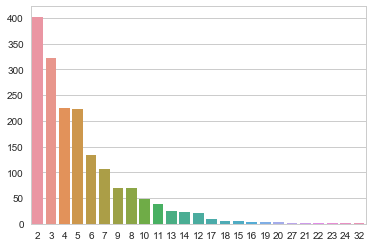

In [31]:
# Graphing a barplot of hot hand player
sns.set(style="whitegrid")
ax=sns.barplot(data=hot_hand_transposed)

In [32]:
cold_hand_values.describe()

count     20.000000
mean     124.150000
std      187.974879
min        1.000000
25%        3.000000
50%       35.500000
75%      157.750000
max      655.000000
dtype: float64

In [33]:
# Transposing the dataframe of shooting history
cold_hand_df=pd.DataFrame(cold_hand_values)
cold_hand_transposed=cold_hand_df.T
cold_hand_transposed

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,16,20,22,27
0,655,514,367,277,172,153,99,76,58,45,26,15,8,5,3,3,3,2,1,1


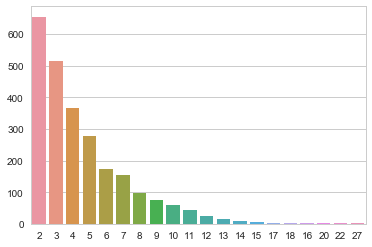

In [34]:
# Graphing a barplot of cold hand player
sns.set(style="whitegrid")
ax=sns.barplot(data=cold_hand_transposed)

# Conclusion : Hot-hand player tends to have the longer streak
* Even though the two players, the hot-hand player and the cold-hand player has the same shooting success chance on average, the hot-hand player tends to have the longer streak than the cold-hand player.
* It is because the hot-hand player gets bigger chance when the previous shooting attempt is successful.
* However, the hot-hand player has much lower number of streaks in general (eg. the hot-hand player has 402 twolength long streaks while the cold-hand player has 655 two-length long streaks